**Opening Statement:** In this project, we deliberately expanded our scope beyond the traditional 9x9 Sudoku puzzles to include larger variants such as 16x16 and 25x25.

**Explanation:** While the classic 9x9 Sudoku is a well-established benchmark for puzzle solving, limiting our study to this size constrains our ability to fully assess the scalability, efficiency, and adaptability of various solving algorithms. Larger puzzles like 16x16 and 25x25 introduce a marked increase in complexity, dramatically expanding the search space and consequently the resource demands—both in terms of time and memory. This variation allows us to rigorously evaluate how each solver performs as the problem size grows, revealing insights into algorithmic trade-offs and limitations that are not apparent in smaller puzzles. Additionally, by investigating multiple grid sizes, we can better simulate real-world scenarios where computational efficiency is critical, and draw more generalizable conclusions about the robustness and scalability of different solving techniques. Ultimately, including diverse Sudoku formats enriches our comparative analysis, ensuring that the chosen solvers are benchmarked not just for common, simpler problems but also for more challenging, resource-intensive puzzles.

# **RUNTIME**

## *1.   Solver Runtime Performance Across Puzzle Sizes*



This graph presents the average runtime (in milliseconds) for each Sudoku solver when handling puzzles of varying grid sizes—namely 9x9, 16x16, and 25x25. To generate this visualization, we first combined the datasets for all three puzzle sizes and then computed the mean runtime for each solver across multiple runs. The resulting grouped bar chart clearly illustrates how each solver’s performance changes with increased puzzle complexity. Notably, the chart highlights the trade-off between computational efficiency and puzzle size, providing critical insights into the scalability and practical applicability of the solvers under real-world conditions.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------- ----------------------------- 3.1/11.5 MB 18.4 MB/s eta 0:00:01
   ----------------------------- ---------- 8.4/11.5 MB 22.6 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 20.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------------------- ------------ 5.5/8.1 MB 28.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 25.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   -------------------- ------------------- 6.6/12.6 MB 33.6 MB/s eta 0:00:01
   ---------------------------------- ----- 11.0/12.6 MB 26.5 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 24.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 25.1 MB/s eta 0:00:00
   -----------------

C:\Users\Admin\AppData\Local\Temp\ipykernel_26412\4109179558.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


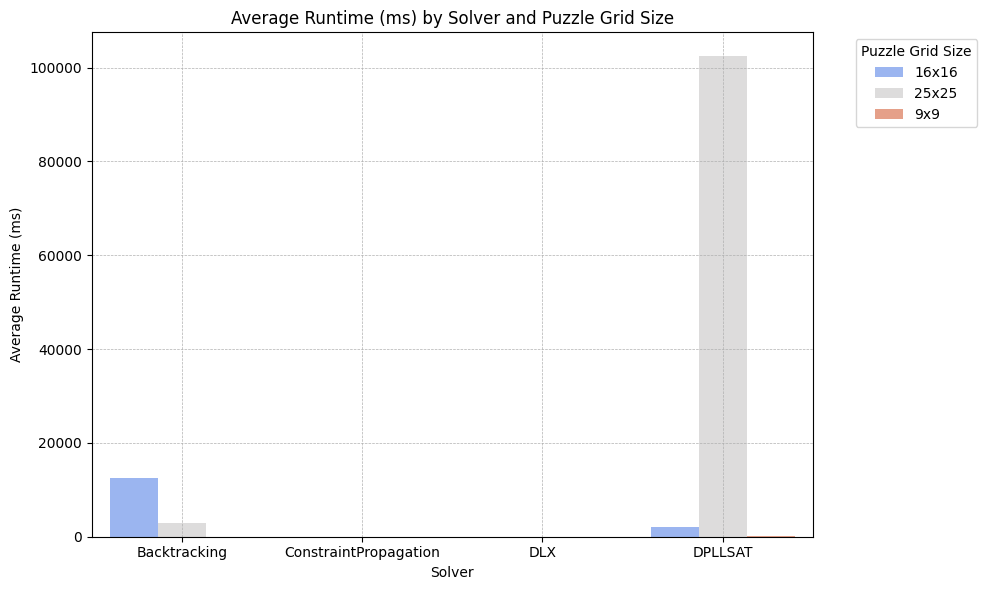

In [3]:
%pip install pandas seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_9x9 = pd.read_csv("../results/puzzle_result_extra.csv")
df_9x9["PuzzleSize"] = "9x9"

df_16x16 = pd.read_csv("../results/puzzle_result_extra_16x16.csv")
df_16x16["PuzzleSize"] = "16x16"

df_25x25 = pd.read_csv("../results/puzzle_result_extra_25x25.csv")
df_25x25["PuzzleSize"] = "25x25"

data = pd.concat([df_9x9, df_16x16, df_25x25], ignore_index=True)

avg_runtime = data.groupby(['Solver', 'PuzzleSize'])["AverageTime(ms)"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Solver",
    y="AverageTime(ms)",
    hue="PuzzleSize",
    data=avg_runtime,
    palette="coolwarm",
    ci=None
)
plt.title("Average Runtime (ms) by Solver and Puzzle Grid Size")
plt.xlabel("Solver")
plt.ylabel("Average Runtime (ms)")
plt.legend(title="Puzzle Grid Size", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

## *2.   Runtime Consistency Analysis: Standard Deviation Distribution Across Solvers*



This graph explores the consistency of each Sudoku solver by analyzing the variation in runtime across multiple executions. For every puzzle, we calculate the standard deviation of runtime over five runs, then use a facet grid to display the distribution of these standard deviations for each solver individually. By employing a logarithmic scale on the x-axis, the visualization effectively handles the wide range of variation values, enabling a clear comparison of performance stability among the solvers. Lower standard deviation values indicate that a solver produces more consistent runtimes, while higher values reveal greater variability in performance. This analysis provides insights into the reliability and predictability of each solving approach under different conditions

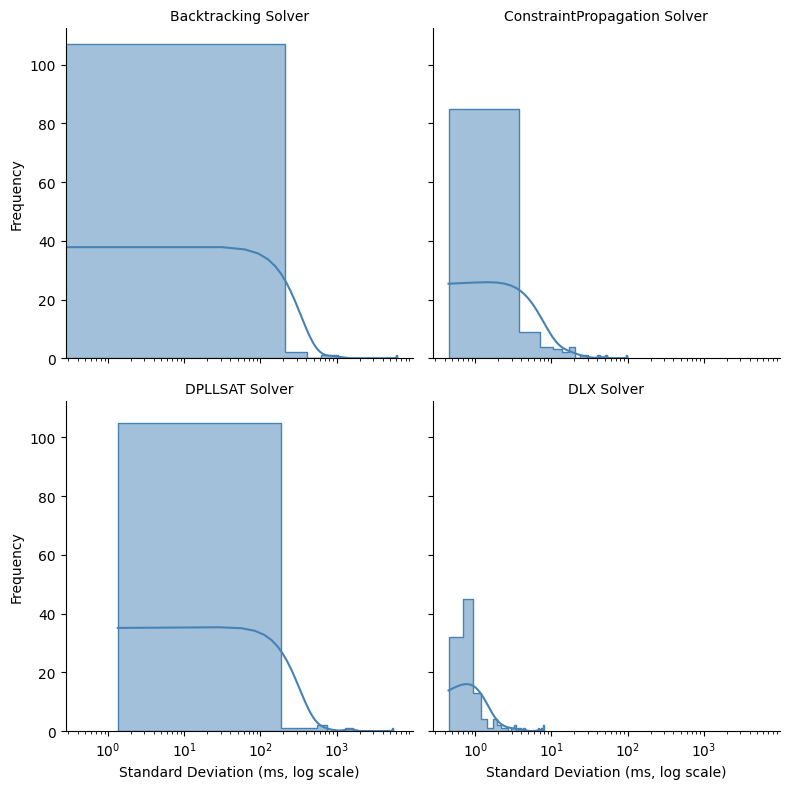

In [4]:
std_data_all = data[["PuzzleName", "Solver", "Run1(ms)", "Run2(ms)", "Run3(ms)", "Run4(ms)", "Run5(ms)"]].copy()
std_data_all["StdDev"] = std_data_all[["Run1(ms)", "Run2(ms)", "Run3(ms)", "Run4(ms)", "Run5(ms)"]].std(axis=1)

g = sns.FacetGrid(std_data_all, col="Solver", col_wrap=2, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "StdDev", bins=30, kde=True, element="step", color='steelblue')
g.set(yscale="linear", xscale="log")
g.set_titles(col_template="{col_name} Solver")
g.set_axis_labels("Standard Deviation (ms, log scale)", "Frequency")
plt.tight_layout()
plt.show()

## *3.   Solver Performance Across Multiple Runs on the Hardest Puzzles*



This visualization focuses on the performance behavior of each solver on the five most challenging puzzles, selected based on the average difficulty score across all solvers. For each of these puzzles, we reshaped the runtime data—collected over five separate runs—into a long format to facilitate detailed analysis. A line chart is then generated for each puzzle, displaying the runtime progression of each solver across all five runs. This approach provides insights into the stability, consistency, and efficiency of the solvers when tackling the most demanding puzzles. By comparing the performance trends of different solvers on these top-tier challenges, we can identify which methods are most robust under high complexity and where performance variations may occur.

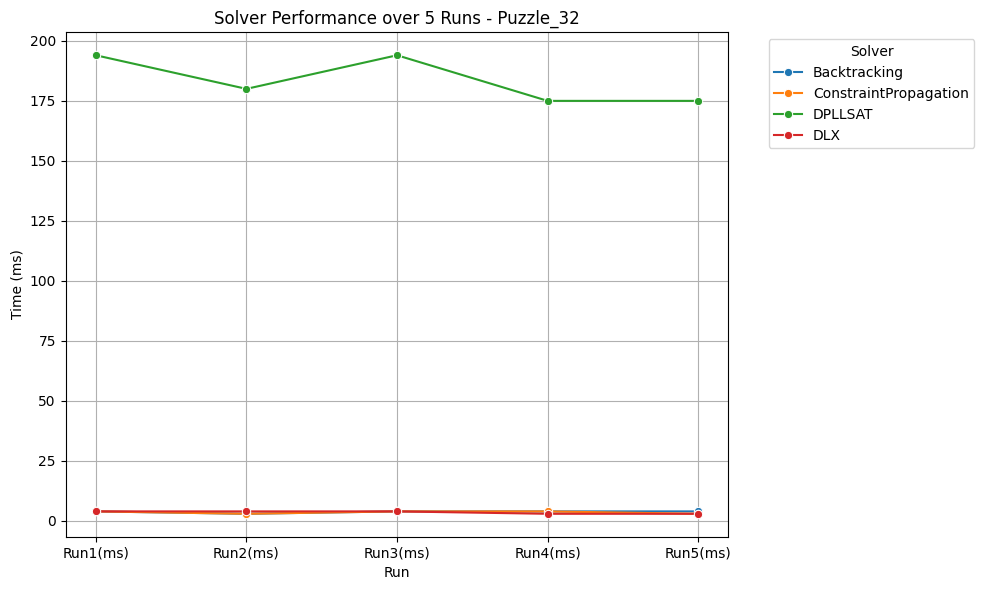

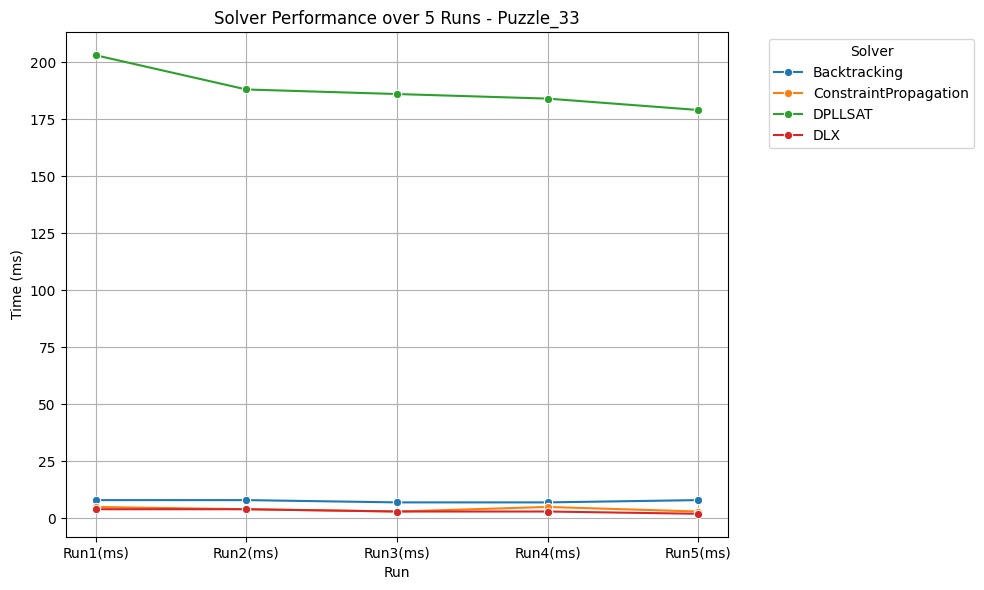

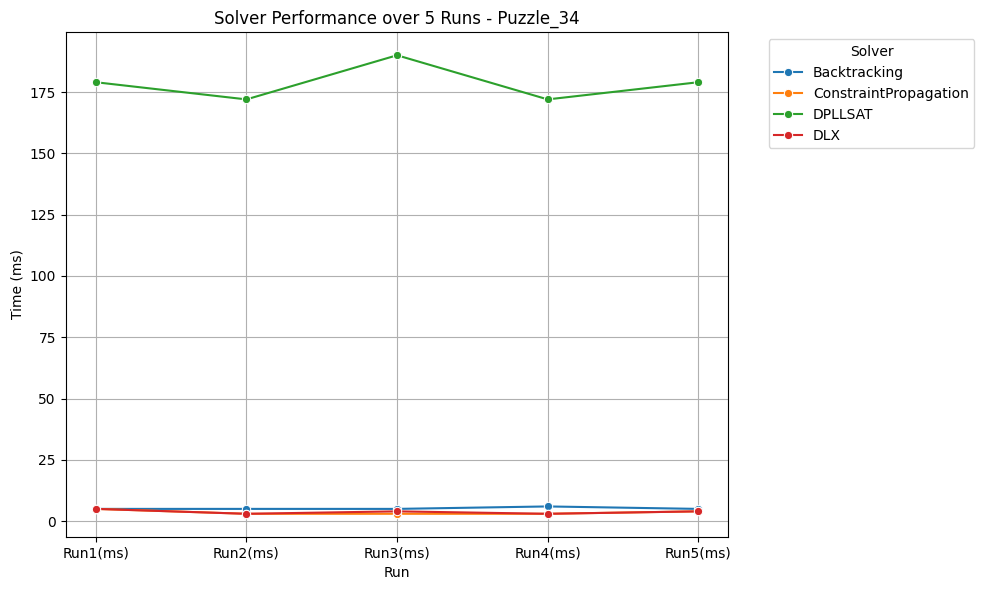

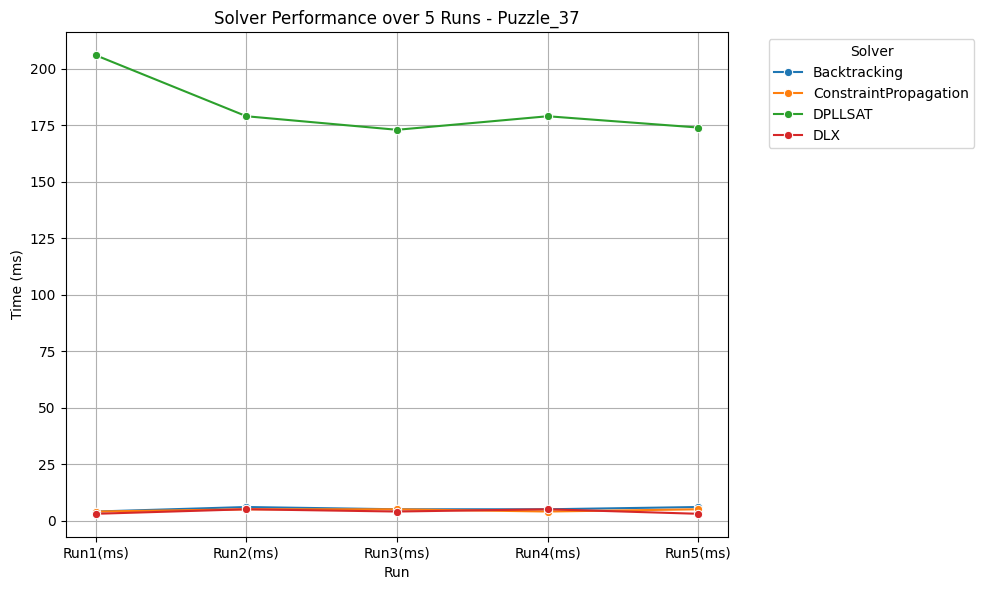

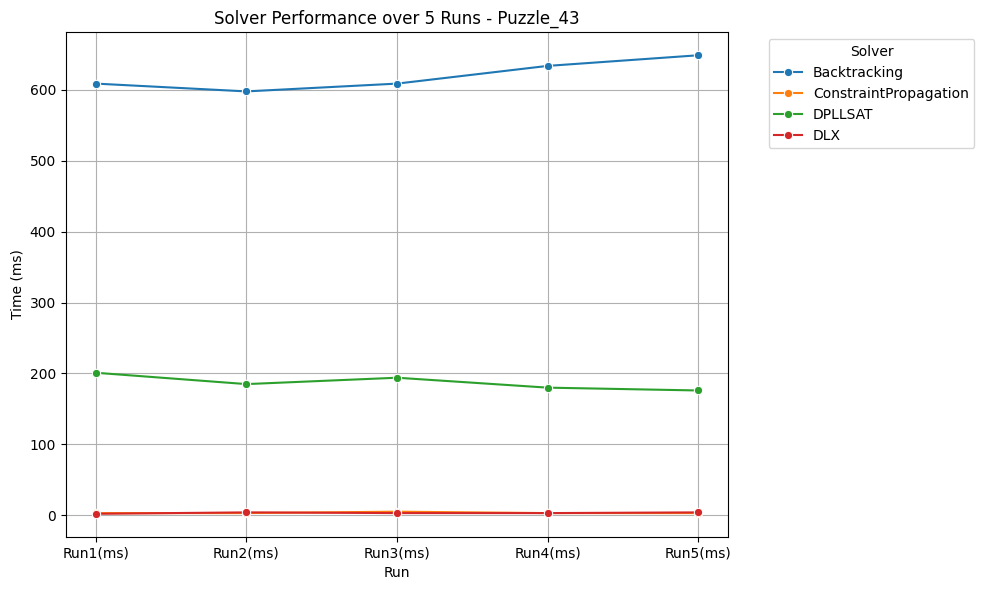

In [5]:
top5_names = data.groupby("PuzzleName")["DifficultyScore"].mean().sort_values(ascending=False).head(5).index.tolist()
top5_all_solvers = data[data["PuzzleName"].isin(top5_names)]

top5_data = top5_all_solvers.melt(
    id_vars=["PuzzleName", "Solver"],
    value_vars=["Run1(ms)", "Run2(ms)", "Run3(ms)", "Run4(ms)", "Run5(ms)"],
    var_name="Run",
    value_name="Time(ms)"
)

for puzzle in top5_data['PuzzleName'].unique():
    plt.figure(figsize=(10, 6))
    puzzle_data = top5_data[top5_data['PuzzleName'] == puzzle]
    sns.lineplot(data=puzzle_data, x="Run", y="Time(ms)", hue="Solver", marker="o")
    plt.title(f"Solver Performance over 5 Runs - {puzzle}")
    plt.xlabel("Run")
    plt.ylabel("Time (ms)")
    plt.legend(title="Solver", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## *4.   Overall Solver Runtime Distribution*



This graph provides a comprehensive overview of the runtime performance across all tested puzzles by visualizing the distribution of average runtimes (in milliseconds) for each solver. By combining puzzles from the 9x9, 16x16, and 25x25 datasets into a single DataFrame, the boxplot summarizes key statistics—such as the median, quartiles, and overall variability—while the overlaid stripplot displays individual data points. This dual representation allows for a clear comparison of solver consistency and outlier behavior across a broad range of puzzle difficulties, highlighting the relative efficiency and reliability of each algorithm under diverse conditions.

C:\Users\Admin\AppData\Local\Temp\ipykernel_26412\479745466.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Solver", y="AverageTime(ms)", palette="Set2")


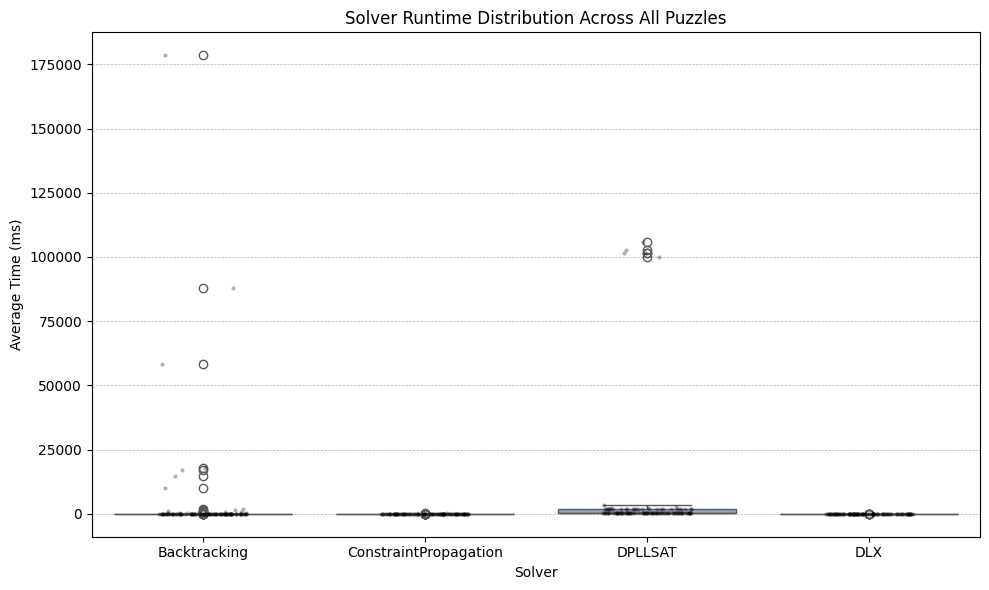

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Solver", y="AverageTime(ms)", palette="Set2")
sns.stripplot(data=data, x="Solver", y="AverageTime(ms)", color="black", alpha=0.3, jitter=0.2, size=3)
plt.title("Solver Runtime Distribution Across All Puzzles")
plt.xlabel("Solver")
plt.ylabel("Average Time (ms)")
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

# **RUNTIME VS. SPACE COMPLEXITY**

## *Time vs. Space Complexity Correlation Analysis*



This scatterplot investigates the correlation between the computational time and the search space explored by each solver. Here, the x-axis represents the number of guesses—a proxy for the space complexity involved in solving a puzzle—on a logarithmic scale to effectively capture the vast differences across puzzle instances. The y-axis reflects the average runtime in milliseconds, providing insight into how the solvers' execution time changes with increased search efforts. Data points are color- and marker-coded according to the solver, enabling a clear visual comparison of efficiency and scalability across the four methods. This analysis helps uncover important trade-offs in algorithm design, illustrating how resource usage expands with problem complexity and how well each solver handles these challenges under diverse conditions.

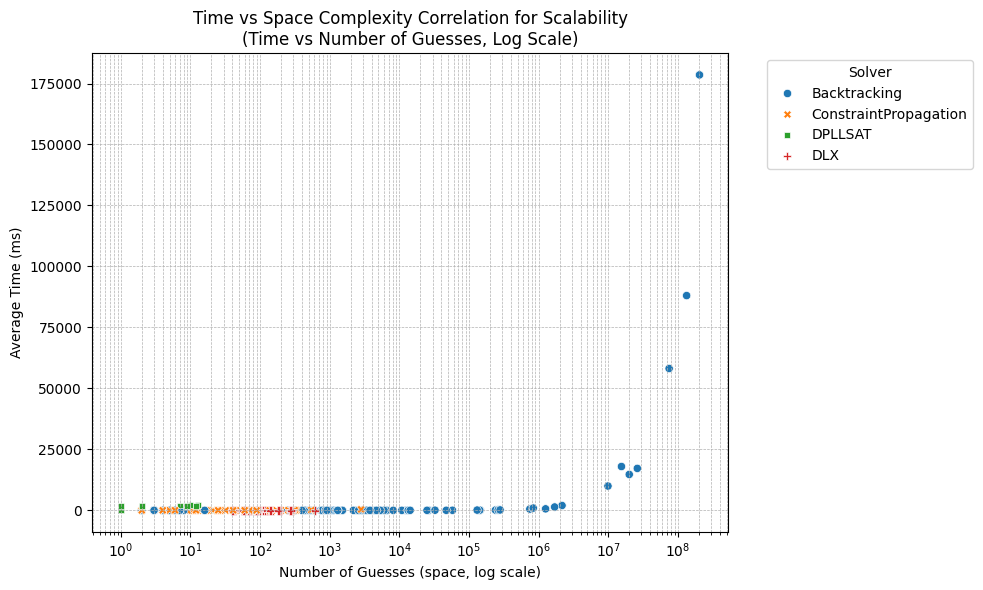

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x="NumberOfGuesses",
    y="AverageTime(ms)",
    hue="Solver",
    style="Solver"
)
plt.xscale("log") 
plt.title("Time vs Space Complexity Correlation for Scalability\n(Time vs Number of Guesses, Log Scale)")
plt.xlabel("Number of Guesses (space, log scale)")
plt.ylabel("Average Time (ms)")
plt.legend(title="Solver", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# **RUNTIME VS. HINT COUNT**

## *Time vs. Hint Count Analysis with Search Effort*



This scatterplot examines the relationship between the number of hints provided in a puzzle and the corresponding average runtime of each solver. In this visualization, the x-axis shows the hint count, while the y-axis depicts the average runtime (in milliseconds). The size of each marker is proportional to the number of guesses made—a proxy for the space complexity involved during the solving process. Additionally, both color and marker style differentiate between solvers, allowing us to compare performance across algorithms. This analysis offers valuable insights into how the complexity indicated by hint count and search effort impacts processing time, thereby highlighting the practical trade-offs between time efficiency and algorithmic exploration across different solving strategies.

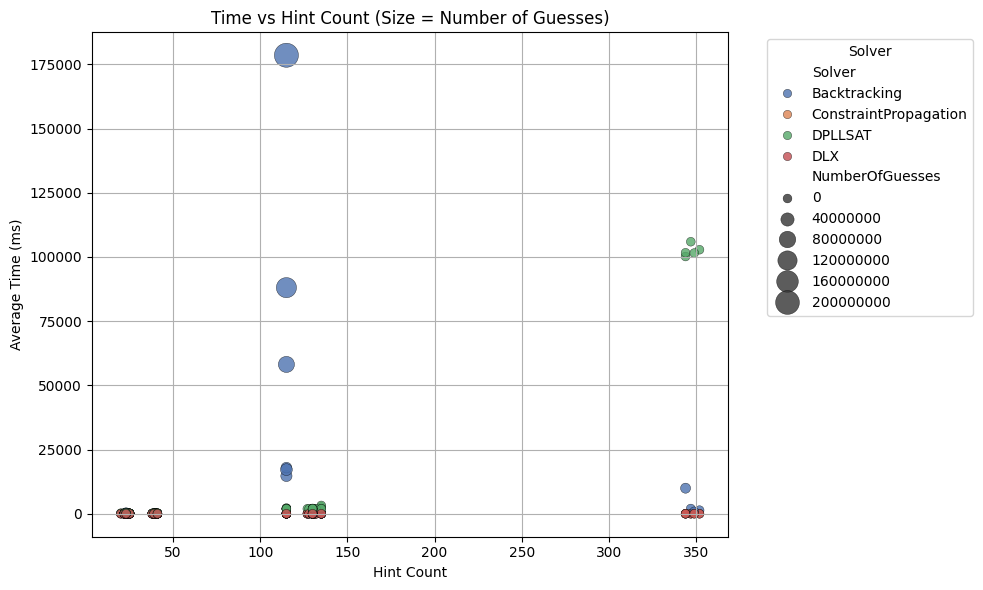

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x="HintCount",
    y="AverageTime(ms)",
    hue="Solver",
    size="NumberOfGuesses",
    sizes=(40, 300),
    alpha=0.8,
    palette="deep",
    edgecolor="black",
    linewidth=0.3
)
plt.title("Time vs Hint Count (Size = Number of Guesses)")
plt.xlabel("Hint Count")
plt.ylabel("Average Time (ms)")
plt.legend(title="Solver", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# **SPACE COMPLEXITY ANALYSIS**

## *Space Complexity Analysis: Hint Count, Number of Guesses, and Propagation Depth*

This scatterplot investigates the relationship between puzzle complexity—as measured by the hint count—and the associated space complexity of the solving process. The x-axis represents the hint count, indicating the number of provided clues, while the y-axis displays the number of guesses made by the solver on a logarithmic scale, serving as a proxy for the breadth of the search space. Additionally, the marker size reflects the propagation depth used during the solution process, offering insight into the extent of constraint propagation required. Different colors and marker styles denote various solvers, allowing for an effective comparison of how each method scales and handles increased complexity. Through this visualization, one can discern the trade-offs between input complexity and computational effort, shedding light on both the efficiency and the resource demands of the solvers.

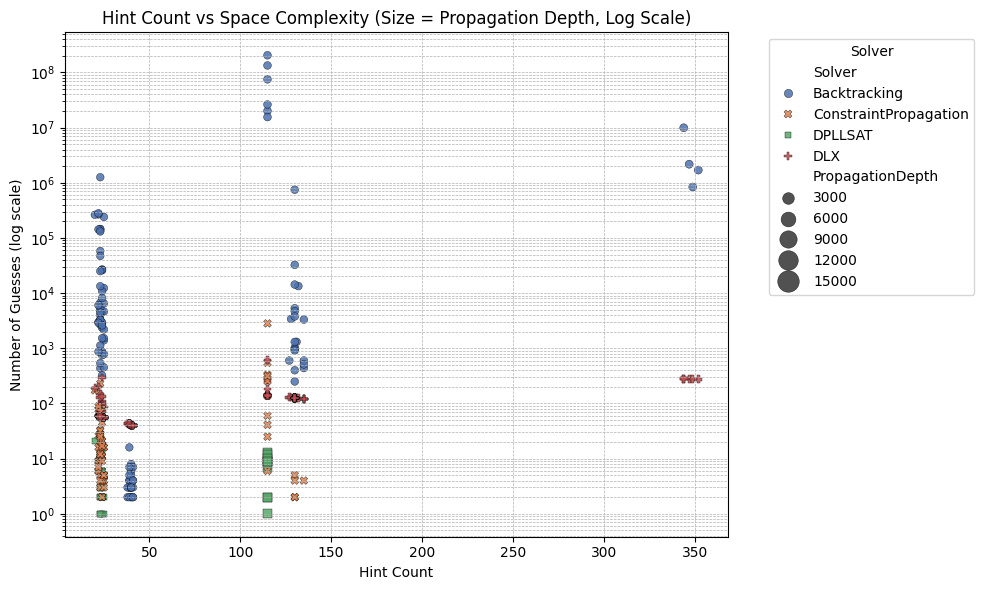

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x="HintCount",               
    y="NumberOfGuesses",        
    hue="Solver",                
    style="Solver",             
    size="PropagationDepth",    
    sizes=(30, 250),             
    palette="deep",              
    alpha=0.85,                 
    edgecolor="black",           
    linewidth=0.3               
)
plt.yscale("log")  
plt.title("Hint Count vs Space Complexity (Size = Propagation Depth, Log Scale)")
plt.xlabel("Hint Count")
plt.ylabel("Number of Guesses (log scale)")
plt.legend(title="Solver", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# **CORRECTNESS**

## *Percentage of Valid Puzzles Solved by Each Solver*



This graph that demonstrates correctness by showing the percentage of puzzles solved for each solver, broken down by puzzle size. This visualization helps confirm that our algorithms handle valid puzzles as expected across the full range of difficulties

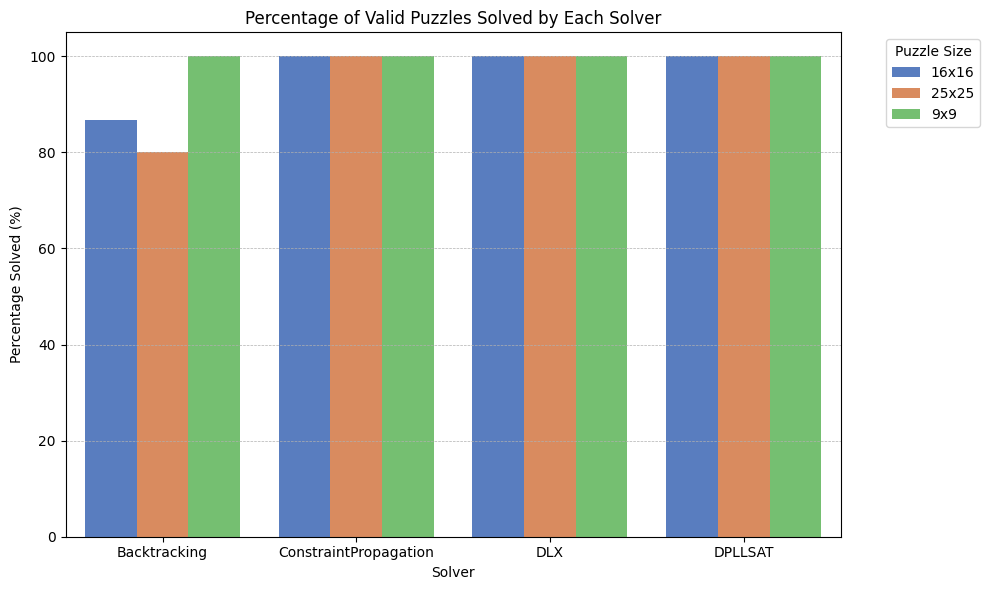

In [10]:
correctness_summary = (
    data.groupby(['Solver', 'PuzzleSize'])['Solved']
    .apply(lambda x: (x.str.strip().str.lower() == "yes").sum() / x.count() * 100)
    .reset_index()
    .rename(columns={'Solved': 'PercentSolved'})
)

plt.figure(figsize=(10,6))
sns.barplot(data=correctness_summary, x="Solver", y="PercentSolved", hue="PuzzleSize", palette="muted")
plt.title("Percentage of Valid Puzzles Solved by Each Solver")
plt.xlabel("Solver")
plt.ylabel("Percentage Solved (%)")
plt.ylim(0, 105)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.legend(title="Puzzle Size", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **PEAK MEMORY USAGE**



## *1.   Peak Memory Usage by Solver and Puzzle Size (Log Scale)*

This graph visualizes the peak memory usage (in MB) for each solver and puzzle size (9x9, 16x16, and 25x25) on a logarithmic scale.

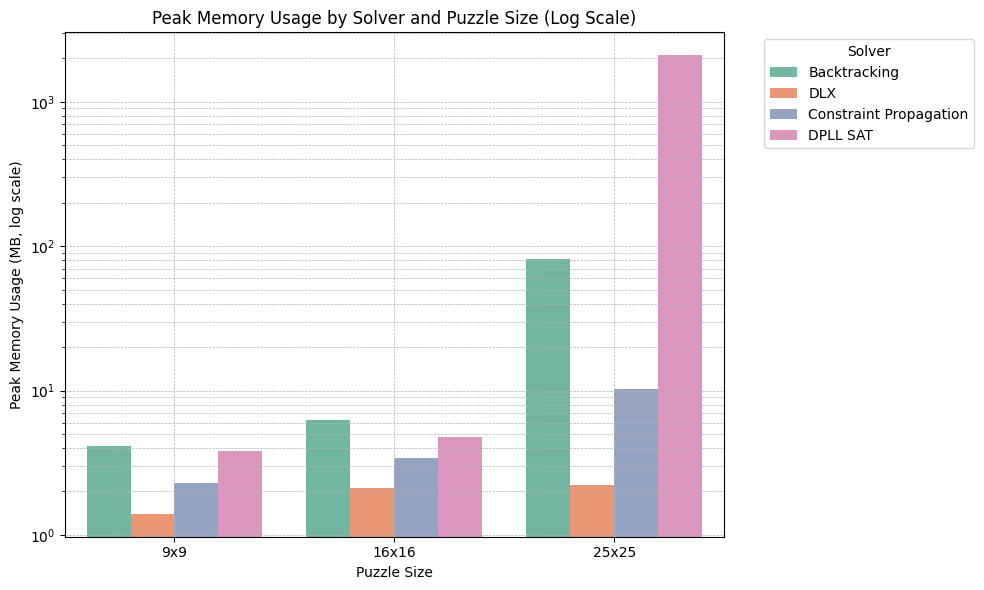

In [11]:
data_memory = {
    "PuzzleSize": ["9x9", "9x9", "9x9", "9x9",
                   "16x16", "16x16", "16x16", "16x16",
                   "25x25", "25x25", "25x25", "25x25"],
    "Solver": ["Backtracking", "DLX", "Constraint Propagation", "DPLL SAT"] * 3,
    "PeakMemoryMB": [4.1, 1.4, 2.3, 3.8,  
                     6.2, 2.1, 3.4, 4.8,   
                     81.5, 2.2, 10.3, 2100] 
}

df_memory = pd.DataFrame(data_memory)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_memory,
    x="PuzzleSize",
    y="PeakMemoryMB",
    hue="Solver",
    palette="Set2"
)
plt.yscale("log") 
plt.title("Peak Memory Usage by Solver and Puzzle Size (Log Scale)")
plt.xlabel("Puzzle Size")
plt.ylabel("Peak Memory Usage (MB, log scale)")
plt.legend(title="Solver", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## *2.   Average Peak Memory Usage by Solver and Puzzle Type (Bytes)*



This graph shows the average peak memory usage (measured in bytes) for each solver, broken down by puzzle type (9x9, 16x16, and 25x25) based on the original data.

C:\Users\Admin\AppData\Local\Temp\ipykernel_26412\4141406253.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_mem, x='Solver', y='PeakMemory(bytes)', hue='PuzzleSize', ci=None)


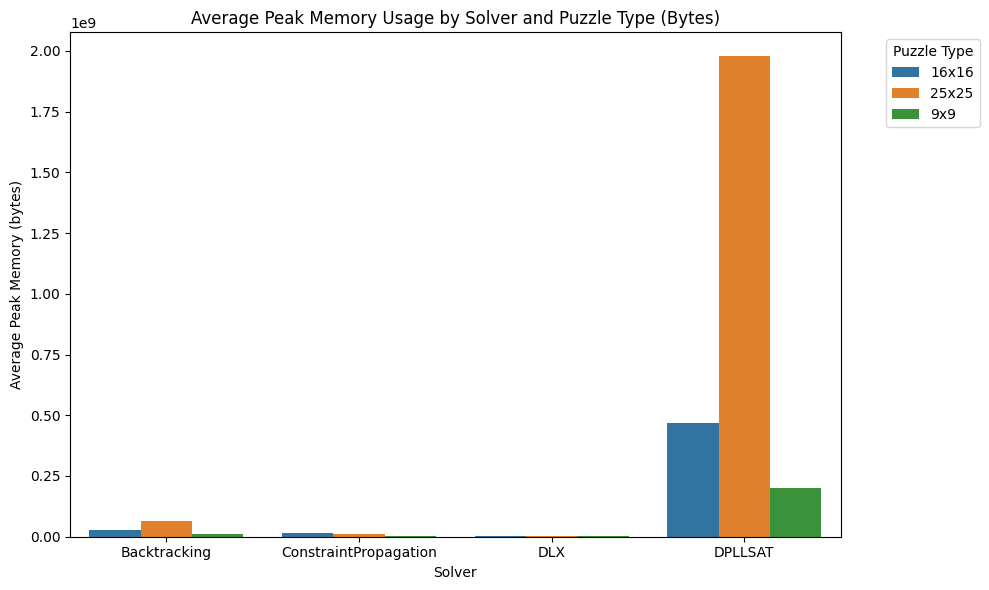

In [12]:
grouped_mem = (
    data.groupby(['Solver', 'PuzzleSize'])['PeakMemory(bytes)']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_mem, x='Solver', y='PeakMemory(bytes)', hue='PuzzleSize', ci=None)
plt.title('Average Peak Memory Usage by Solver and Puzzle Type (Bytes)')
plt.xlabel('Solver')
plt.ylabel('Average Peak Memory (bytes)')
plt.legend(title='Puzzle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **INITIALIZATION TIME**



## *1.   Initialization Time (μs) by Solver and Puzzle Size*



This boxplot shows the distribution of initialization times across different solvers and puzzle sizes. It helps illustrate the overhead involved in parsing input, building grid representations, and setting up data structures before the solving starts.

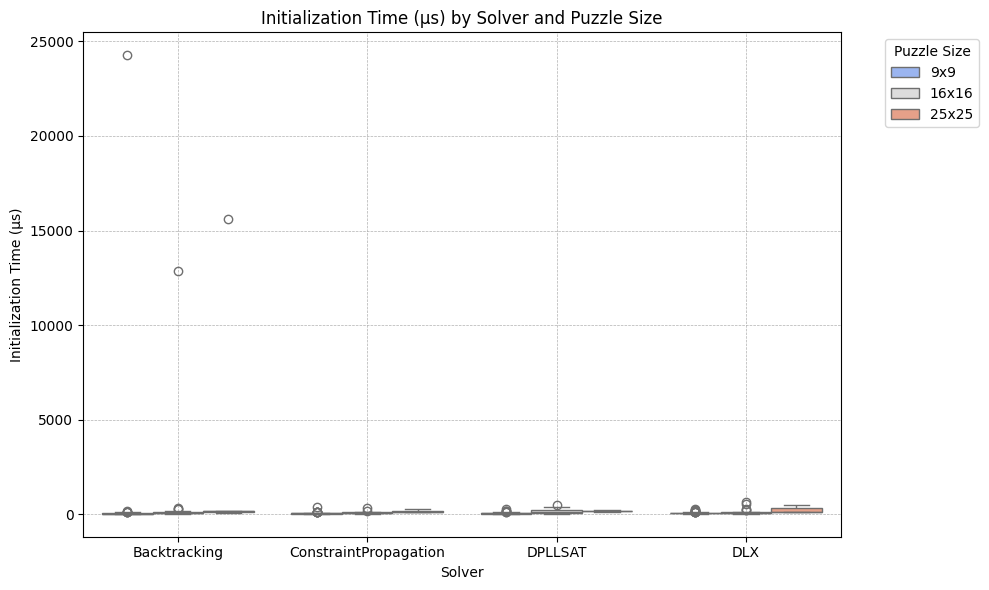

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data,
    x="Solver",
    y="InitTime(μs)",
    hue="PuzzleSize",
    palette="coolwarm"
)
plt.title("Initialization Time (μs) by Solver and Puzzle Size")
plt.xlabel("Solver")
plt.ylabel("Initialization Time (μs)")
plt.legend(title="Puzzle Size", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## *2.   Initialization Start Times by Solver and Puzzle Size*



This box plot shows the distribution of the initialization start times for each solver and puzzle size. This visualization helps illustrate when the initialization phase begins for different methods.

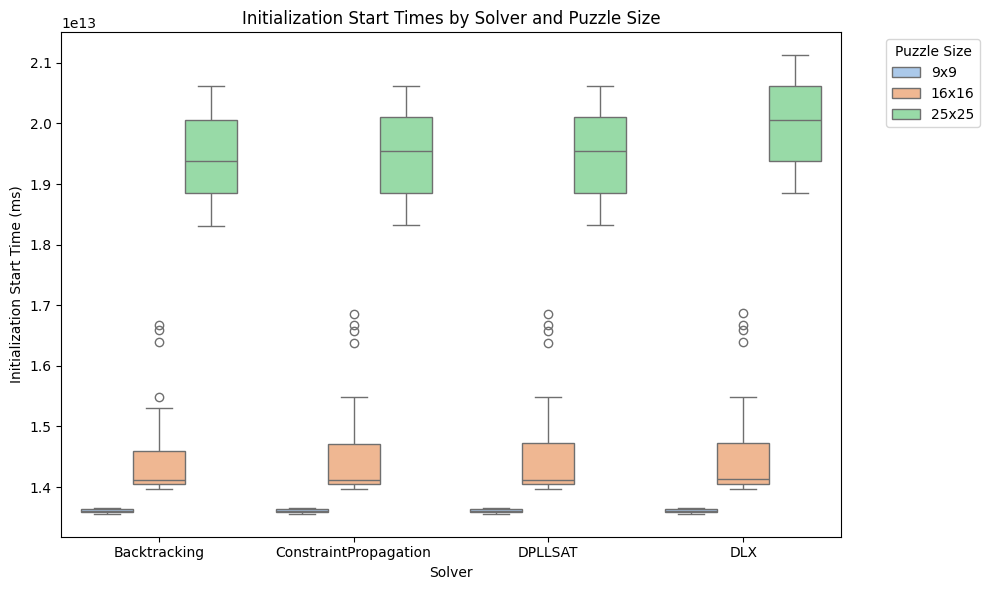

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data,
    x="Solver",
    y="InitStartTime(ms)",
    hue="PuzzleSize",
    palette="pastel"
)
plt.title("Initialization Start Times by Solver and Puzzle Size")
plt.xlabel("Solver")
plt.ylabel("Initialization Start Time (ms)")
plt.legend(title="Puzzle Size", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## *3.   Initialization End Times by Solver and Puzzle Size*



This box plot shows the distribution of the initialization end times for each solver and puzzle size, thus providing insight into when each solver completes the preparation tasks (such as parsing and data structure setup).

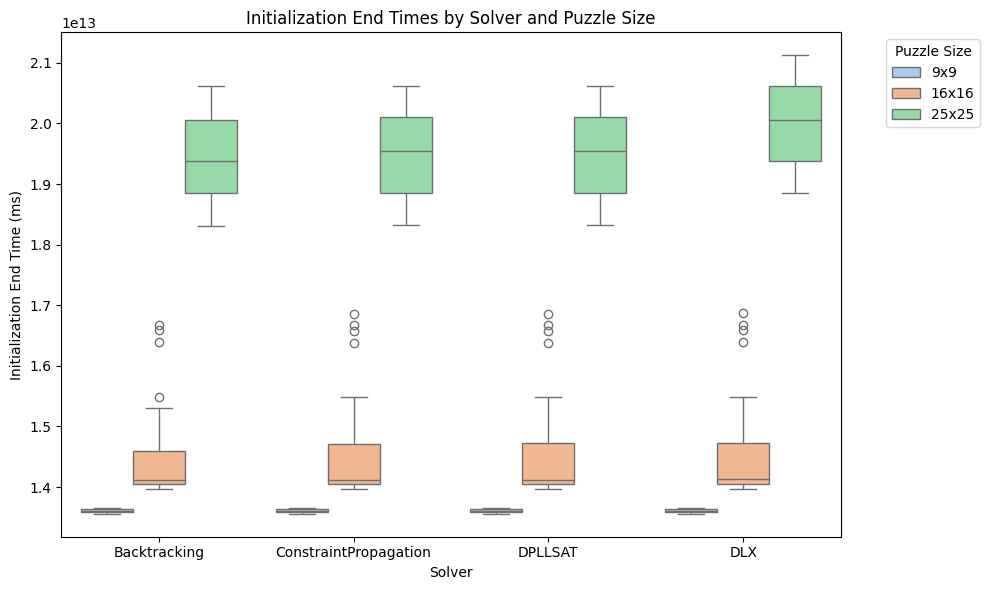

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data,
    x="Solver",
    y="InitEndTime(ms)",
    hue="PuzzleSize",
    palette="pastel"
)
plt.title("Initialization End Times by Solver and Puzzle Size")
plt.xlabel("Solver")
plt.ylabel("Initialization End Time (ms)")
plt.legend(title="Puzzle Size", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **MEMORY USAGE VS. INITIALIZATION**

## *Peak Memory Usage vs. Initialization Duration*



This scatter plot shows how the peak memory usage (in MB) correlates with the duration of the initialization phase across solvers. Each point represents a puzzle run; color and marker style indicate the solver used.

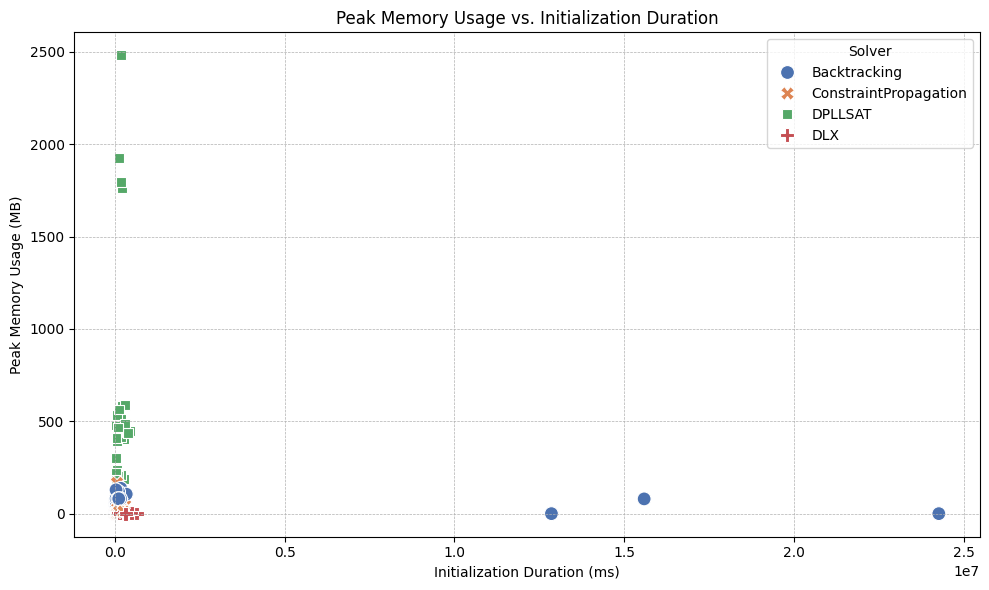

In [16]:
data["InitDuration(ms)"] = data["InitEndTime(ms)"] - data["InitStartTime(ms)"]
data["PeakMemoryMB"] = data["PeakMemory(bytes)"] / 1e6

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x="InitDuration(ms)",
    y="PeakMemoryMB",
    hue="Solver",
    style="Solver",
    s=100,
    palette="deep",
)
plt.title("Peak Memory Usage vs. Initialization Duration")
plt.xlabel("Initialization Duration (ms)")
plt.ylabel("Peak Memory Usage (MB)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()